In [52]:
#coil gun simulation script

%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

pi = math.pi
sqr = lambda x:x*x
e = lambda x: math.pow(10,x)


In [70]:
 def simulate(inductance):
    u0 = 4 * pi * e(-7)#magnetic permiability of free space
    k = 100#relative permiability of magnetic circuit(note this ignores saturation)

    cap = lambda: None
    cap.C = .006 #Farads (6 millifarads)
    cap.V = 1000 #volts
    cap.Q = cap.V*cap.C #volts

    wire = lambda: None
    wire.p = 1.724 * e(-8) #resistivity (ohm meters)
    wire.d = .002 #wire diameter (meters)
    wire.A = pi * sqr(wire.d/2); #cross sectional area

    coil = lambda: None
    coil.r = .01 #radius (meters)
    coil.l = .1  #length (meters)
    coil.N = coil.l/wire.d #turns
    coil.A = pi * sqr(coil.r)

    wire.l = coil.N * (2 *  pi * coil.r)

    circuit = lambda: None
    circuit.R = wire.p * wire.l / wire.A + .1 #1 ohms from the whole circuit
    circuit.L = u0 * k * sqr(coil.N) * coil.A / coil.l
    if not inductance:
        circuit.L = 0 #disable inductance

    circuit.current = 0 # initial state
    circuit.offset = 0 #the difference in current with and without inductance 

    field = lambda: None
    field.H = 0;
    field.B = 0;
    
    def update(dt):
        #Left Hand approx: dI = (cap.V - circuit.current) * dt / circuit.L
        dI = (cap.V - circuit.current * circuit.R) / (circuit.R + circuit.L / dt)
        circuit.current += + dI
        circuit.offset = circuit.current - (cap.V/circuit.R)
        cap.Q -= circuit.current*dt
        cap.V = cap.Q/cap.C
        
        field.H = (coil.N/coil.l)*circuit.current;
        field.B = field.H * k* u0;
        
    #run simulation
    duration = .15
    dt = .00001
    log = np.zeros((math.ceil(duration/dt) +1 , 8))    
    
    time = 0
    i = 0
    while time < duration:
        log[i,0]=time
        log[i,1]=cap.V
        log[i,2]=circuit.current
        log[i,3]=circuit.offset
        log[i,4]=cap.Q
        log[i,5]=field.H 
        log[i,6]=field.H * u0
        log[i,7]=field.B
        update(dt);
        time += dt
        i+=1
    
    return log

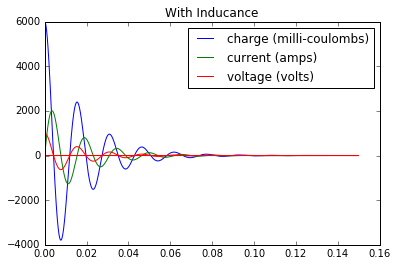

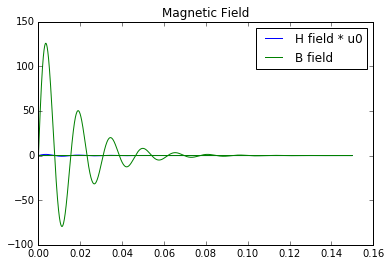

In [71]:
#fig = plt.figure()

#plot simulation
log = simulate(True)
plt.figure(0)
plt.title("With Inducance")
plt.plot(log[:,0], log[:,4]*1000,label='charge (milli-coulombs)')#coulombs
plt.plot(log[:,0], log[:,2], label='current (amps)')#amps
plt.plot(log[:,0], log[:,1],label='voltage (volts)')#volts

plt.legend()

plt.figure(1)
plt.title("Magnetic Field")
plt.plot(log[:,0], log[:,6], label='H field * u0')
plt.plot(log[:,0], log[:,7],label='B field')

plt.legend()



In [ ]:
'''
#without indudata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYUAAAEKCAYAAAD9xUlFAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzt3Xl4FFX28PHvCYQlkD0sCYEAAVkEQRDEDaMIIyjiMkRAUMRx48V9GZBRYRgX/Om4i6AMiIiCy7giMopB3EAUZJEdCRACsgXCmpCc94+utJ2QkA7ppLvD+TxPnlTdunXrdCfpk1u3qq6oKsYYYwxAiL8DMMYYEzgsKRhjjHGzpGCMMcbNkoIxxhg3SwrGGGPcLCkYY4xxs6RggoKIZItI0xNs/11ELq6kWPJFpHllHMuYymZJwVQ6ERkpIp8VKVsnIp8WKVsrIqkAqhquqpuc8iki8s9yHP8GEVlwsvsDdnOPqbIsKRh/+AY4V0QEQEQaANWBTkXKkp26FaE8H+zisyiMCTCWFIw//ATUADo6692Br4E1Rco2qOp2+POUjYjcDFwHPCgi+0XkI492zxSRX0Vkr4i8LSI1vAnGOfV0X0n7isgDIrJNRLaKyI14JBQR+VpEhnmsF+qFiMjpIjJXRHaLSKaIjHTKu4jI987xMkTkRRGp7rFfvojc6vSWdovIS0VivllEfnPegxUi0tEpjxeR90TkDxHZICJ3ePMeGFPAkoKpdKqaCyzE9cGP8/0b4Ntiyty7Ofu+BrwFPKWqEaraz6NOf6AX0AzoAAwtQ1jF7isilwL3Aj2AlsAl3rxEZ9+6wP+A2UA80AL4yqmTB9wNxADnABcDw4u0cxnQGVeiTBWRXk67/YFHgMGqGgFcAex2elmfAEuc4/UA7hKRnt6/DeZUZ0nB+Mt8/kwAFwALKJwULnDqFPDmlM3zqrpDVbNwfTh2LG0HL/btD0xR1VWqehgYU4Y2LwcyVfU5Vc1R1YOq+hOAqv6iqovUZTMwCbiwyP5PqGq2qm7B1ZMqiOkmXEnxF6etjU6dLkCcqj6mqnnOGMzrwIAyxGxOcdVLr2JMhfgGGC4iUbg+yDaIyB/AVKesHWUfT9jhsXwI13/L5d03AVjssS0d78cUGgMbitsgIi2BfwNnAbVx/S3+XEpMdUtpNwloJCJ7Cg6D6x+/ihqXMVWQ9RSMv/wARAG3AN8BqGo2sM0py1DV9BL2rcyrfzJxfQgXSCpy/INAmMd6Q4/lLbhOGRVnArAKSFbVKGA03iebLbgG4Ysr36iqMc5XtKpGqmpfL9s1xpKC8Q9VPYLrP/B7cZ06KvCdU3ai/253AJV1n8AsYKiItBGRMFzn8j0tBa4Wkdoi0gLXqZ0CnwINROROEakhInVFpKuzLRzYr6qHRKQ1cHsZYnoduF9EOgGISLKINAYWAftF5EERqSUi1ZyB7rPK/rLNqcqSgvGn+UA9XGMJBRY4ZfOL1PX873wycLqI7BGRD4rZXlYl7quqc4DngHnAWv4cKC7wLJALbAemANM99j0A9MQ1ELzd2T/F2Xw/cJ2I7AcmAu+UEpN7XVXfAx4DZjj7/xeIUdV8oC+usYffgT+A14CIEl+5MUWIN5PsiEgkrv9O2gH5wDBcv+AzcXWnNwGpqrrPqf8C0BtX13qoqi51ym/A1U1W4DFVnebj12OMMaYcvO0pPA/MVtU2uC7XWw2MBL5U1Va4/osaBSAivXGdJ20J3Aq86pRH4+p6dwHOBh51ko0xxpgAUWpSEJFw4AJVnQKgqsecHkE/4A2n2hvOOs73aU7dhUCkc3fqX4C5qrrPuexvLnCpL1+MMcaY8vGmp9Ac2OU8b+YXEZnkDLg1UNUdAM5dp/Wd+o1wXQVRYKtTVrQ8wykzxhgTILxJCtWBTsDLqtoJ1zjBSEoenCt6WZ04dYu73M4eLGaMMQHEm5vXtgJbVLXgBp73cSWFHSLSQFV3iEhDXFc6FNT3vK47Ede151v588qLgvKvix5MRCxRGGPMSVDVcj+ssdSegnOKaIuInOYU9QBWAh/z57NlhgIFDyb7GLgeQES6AVlOG18APUUk0hl07umUHSc/X1EN7K9HH33U7zFYnBZnMMcZDDEGU5y+4u1jLu4E3hKRUGAjcCNQDZjlPCFyM65nxKCqs0Wkj4isx3Wq6UanfK+IjMN1w5ICY9U14HycQ4egTp1yvCpjjDEnxaukoKq/4rqUtKhinxipqiNKKJ8KTC3teFlZlhSMMcYfAvKO5r17/R1B6VJSUvwdglcsTt+yOH0nGGKE4InTV7y6o7kyiYguWKCcf76/IzHGmOAhIqgPBpoD8tHZwdBTMIGpadOmpKeX9HBVY4JfUlISmzZtqrD2LSmYKiU9Pd2nV2IYE2icacwrTECOKWQVe02SMcaYihaQScF6CsYY4x8BmRSsp2CMMf4RkEnBegrmVPLGG29wwQUX+DuMEu3atYvWrVuTk5NzUvuHh4e7B0ZvvPFGHnnENXnd/Pnzadz4zyfitGvXjm++qdzppC+66CL+85//+Lzdk/2ZfvLJJwwcONDn8ZRFQCYF6ymYU01FDx6Wx5NPPsmwYcOoUaPGSe2fnZ1N06ZNi93m+bpXrFhB9+7dT+oYgehkfqZ9+/Zl5cqVrFixogIi8k5AJgXrKRhzcvLy8nzaXk5ODm+88QaDBw/2abumZAMGDGDixIl+O74lBWMqydatW7nmmmuoX78+9erV484773RvU1UeeOABYmJiSE5OZs6cOe5tU6dOpW3btkRERNCiRQsmTZrk3lZwCuapp54iPj6eYcOGAfDUU0+RkJBAYmIikydPJiQkhI0bNwKuD/r777+fpKQk4uPjGT58OEePHi025oULFxIdHU1CQoK77KKLLuLhhx/mvPPOIzw8nH79+rFnzx4GDx5MZGQkZ599Nps3b3bX9zz2iTRr1ox58+aVuP3bb7/lvPPOIzo6mqSkJKZNc83mu3//fq6//nrq169Ps2bNeOyxx9z7jB07liFDhrjX09PTCQkJIT8//7j2VZV//etfNG3alIYNGzJ06FD2799faL+pU6fSpEkTYmNjmThxIosXL6ZDhw7ExMRwxx13FGovPz+fO++8k6ioKNq2bVvotU2dOpXk5GQiIiJITk7m7bffdm9LSUnhs88+K/X9qigBmRTs9JGpavLz87n88stp1qwZmzdvJiMjgwEDBri3L1y4kDZt2rB7924eeOABbrrpJve2Bg0aMHv2bPbv38+UKVO45557WLp0qXv79u3bycrKYvPmzUyaNIk5c+bw3HPPMW/ePNavX8/8+fMLncp48MEHWb9+PcuWLWP9+vVkZGTwz3/+s9i4ly9fTqtWrY4rnzlzJm+99Rbbtm1j/fr1nHvuudx0003s3buX1q1bM3bsWHddX5wa27JlC3369OGuu+5i165dLF26lI4dOwIwYsQIsrOz2bRpE2lpaUybNo0pU6aUePyS4pkyZQrTpk1j/vz5bNy4kezsbEaMKPwYt0WLFrF+/XpmzpzJ3XffzeOPP868efNYsWIFs2bNYsGCBe66CxcupEWLFuzevZsxY8Zw9dVXk5WVxaFDh7jrrrv44osv2L9/P99//737tQC0adOG9PR0Dhw4UO737aT4+3GvxTz+VevWVWNOiutX+kTbffNVVj/88IPWr19f8/Lyjts2depUbdmypXv90KFDGhISojt27Ci2rSuvvFJfeOEFVVVNS0vTmjVrak5Ojnv7sGHD9KGHHnKvr1+/XkVEN2zYoKqqderU0Y0bN7q3f//999qsWbNij/XYY4/pwIEDC5WlpKTo448/7l6/7777tE+fPu71Tz75RM8880z3uuexhw4dqg8//LA79saNG7vrNW3aVL/66qti43jiiSf06quvPq48Ly9Pa9asqatXr3aXTZw4US+66CJVVR0zZowOGTLEvW3Tpk0aEhLi/jmkpKTo5MmTVVW1R48eOmHCBHfdNWvWaGhoqObl5bn3y8zMdG+PjY3VWbNmudevueYaff7551XV9TNt1KhRoVi7du2q06dP14MHD2p0dLR+8MEHevjw4eNeU25uroqIbtmypdj3oqTfcae83J/BAdlTOHwYjh3zdxSmKvJVWiirLVu2kJSUREhI8X9yDRs2dC/Xrl0bVXX/p/j5559zzjnnEBsbS3R0NJ9//jm7du1y169Xrx6hoaHu9W3bthW6qsdzeefOnRw6dIjOnTsTExNDTEwMvXv3Zvfu3cXGFR0dTXZ29nHlDRo0KBRv0fXy/pcbHh5OeHg4ERERbN26lS1btpCcnHxcvV27dpGbm0uTJk3cZUlJSWRkZJT5mNu2bSMpKalQO8eOHWPHjh3usvr167uXS3vdjRoVnm04KSmJbdu2ERYWxsyZM5kwYQLx8fH07duXNWvWuOtlZ2cjIkRFRZX5NfhCQCaFyEg7hWSqlsaNG7N58+Ziz2WfSE5ODn/961958MEH2blzJ3v37qV3796FHuVR9HRIfHw8W7duda97nt+Pi4sjLCyMlStXsmfPHvbs2UNWVhb79u0r9vhnnHEGa9euLVPMvpCdnU12djb79+8nMTGRxo0bs379+uPqxcXFERoaWuh5V+np6e4P5Dp16nDo0CH3tszMzBKPmZCQcFw7oaGhhT74y6JoYtq8ebN7bKZnz57MnTuX7du306pVK26++WZ3vVWrVtG0aVPq1q17Usctr4BMClFRNthsqpauXbsSHx/PyJEjOXToEEePHuX7778vdb+cnBxycnKIi4sjJCSEzz//nLlz555wn9TUVKZMmcLq1as5dOgQ48aNcycOEeHmm2/m7rvvZufOnYDrw6ukNrt27UpWVtYJP0wrw3XXXcdXX33Fe++9R15eHnv27OHXX38lJCSE1NRURo8ezYEDB0hPT+fZZ591Dy537NiRb775hi1btrBv3z6efPLJEo8xcOBAnn32WTZt2sSBAwcYPXo0AwYMcPfutIxdxB07dvDiiy9y7Ngx3n33XVavXk2fPn34448/+OSTTzh06BChoaHUrVuX6tX/fAzd/Pnz6d2790m8S74RkEkhOtp6CqZqCQkJ4ZNPPmHdunU0adKExo0bM2vWrBLrF3yI161blxdeeIH+/fsTExPDO++8Q79+/U54rEsvvZQ777yTiy66iNNOO41zzz0XgJo1awIwfvx4WrRoQbdu3YiKiqJXr14l9gZCQ0MZOnQob7755nGxecvb+ieq17hxY2bPns3TTz9NTEwMZ555JsuWLQPghRdeICwsjObNm9O9e3cGDx7MjTfeCMAll1zCtddeyxlnnEGXLl3o27dvicccNmwYQ4YMoXv37iQnJxMWFsYLL7xQYnylrXfr1o1169YRFxfHww8/zPvvv090dDT5+fk888wzNGrUiLi4OL755hteeeUV935vv/02t956qzdvWYUIyPkULrlEeeAB6NXL39GYYOM8U97fYQSU1atX0759e44ePVrimMaJ7Nq1i+7du7NkyRJ3YjEV49NPP2X69Om88847JdYp6XfcV/MpBGRS+Otflf79ITXV39GYYGNJweXDDz/ksssu48CBAwwdOpTq1avz/vvv+zss4wMVnRQC9vSRjSkYc/ImTpxIvXr1aNmyJaGhoYVOTxhzIgE5yY4lBWPK5/PPP/d3CCZIBWRPISrKBpqNMcYfAjIpWE/BGGP8IyCTgvUUjDHGPwIyKVhPwRhj/MOSgjHGGLeATAp2+siYwHT++efz66+/+jsMt+XLl3Peeef5O4wqJSCTgvUUjKlc3sxV/OmnnxIREUGHDh0qKarStW/fnujoaL9OSlPVeJUURGSTiPwqIktEZJFTFi0ic0VkjYh8ISKRHvVfEJF1IrJURDp6lN8gImudfa4v6XgFPQW7MdWY4xV3N2tl3MX96quvFprFLFAMGjSIV1991d9hVB3eTLoAbASii5SNBx50lv8OPOks9wY+c5bPBn50lqOBDUAkEFWwXMyxVFW1Th3V/fuLnUvCmBJxMjPgVJItW7bo1VdfrfXq1dO4uDi94447VNU1EczgwYPd9TZt2qQiUmgimNGjR+t5552nYWFhumHDhmLL9u3bp8OGDdP4+HhNTEzUf/zjH5qfn6+qrklfzj//fL3//vs1OjpamzdvrnPmzFFV1dGjR2u1atW0du3aGh4e7o7LU05OjtauXVszMjLcZYsWLdJzzjlHo6KiNCEhQUeMGKG5ubnu7SKir7zyirZs2VIjIiL04Ycf1g0bNug555yjkZGReu2117rrp6WlaWJioj7++OMaFxenzZo107feesvd1meffaZt27bV8PBwTUxM1Geeeca9LSMjQ2vXrl1ooqGqrKTfcXw0yY63SeF3ILZI2WqggbPcEFjlLL8KXOtRbxXQABgATPAon+BZz6NcVVUTE1XT033xFppTSaAmhby8PO3QoYPed999evjwYT169Kh+9913qurd7GBJSUm6atUqzcvL09zc3GLL+vXrp7fffrsePnxYd+7cqWeffbZOmjRJVV1JoUaNGjp58mTNz8/XCRMmaEJCgvuYnjOQFWflypVat8iUiD///LMuXLhQ8/PzNT09Xdu2beueeUzVlRT69eunBw4c0N9++01r1qypl1xyiW7atEn379+vbdu21WnTpqmqKylUr15d77//fs3JydH58+drnTp1dO3ataqqGh8f736/srKydMmSJYViiYiI0OXLl5fthxKkKjopePuYCwW+EBEFJqrq605C2OF8im8XkYIpiRoBWzz23eqUFS3PcMqKVXAKyWNCJWPKTcaWf75gAH20bKdrFi1aRGZmJk899ZT7SaUFj7T2xtChQ2ndujWAe3/Psl27djFnzhz27dtHzZo1qVWrFnfffTeTJk1yT+CSlJTEsGHDALjhhhsYPnw4f/zxR6HZxEqSlZVFeHh4obJOnTq5l5s0acItt9zC/PnzufPOO93lI0eOpE6dOrRp04Z27drRq1cv9+xmvXv3ZsmSJe5TUiLCuHHjCA0NpXv37lx22WXMmjWL0aNHU6NGDVauXEn79u2JjIwsNKcxuGZqy7KrU3zC26RwrvPBXw+YKyJrcCWK4hT9qxOnbnF/jSX+Zdlgs6kIZf0w95XSpuMsjeeUmsWVpaenk5ubS3x8PPDnGQDPaSqLTvkJcODAAa+SQnHTcq5bt457772XxYsXc/jwYY4dO0bnzp0L1Slt+krPqS6jo6OpVauWe71g+kqA999/n3HjxvH3v/+dDh068MQTT9CtWzd33ezsbL9NX1nVeJUUVHW7832niHwIdAV2iEgDVd0hIg2BP5zqWwHP3+BEYJtTnlKk/OvijjdmzBh27IAJE0A1hZSUlOKqGRM0PKfjLJoYvJkysrgJaDzLGjduTK1atdi9e3eZJ8EpqX1PLVu2RFXJzMx0J57bb7+dTp06MXPmTMLCwnj++efL9XjuvXv3cvjwYXfC2rx5M+3btwegc+fOfPjhh+Tl5fHiiy+SmprqnmY0MzOT3NxcWrVqddLHDkZpaWmkpaX5vN1S/20RkTARqess1wF6AcuBj4GhTrWhwEfO8sfA9U79bkCWc5rpC6CniESKSDTQ0yk7zpgxY+jWbQyXXjrGEoKpEk40HWdZpowsScOGDenVqxf33HMP2dnZqCobN27km2++8Wr/Bg0asHHjxhK3V69enUsuuYT58+e7y7Kzs4mIiCAsLIzVq1czYcKEMsftSVV59NFHyc3NZcGCBXz22WekpqaSm5vLjBkz2L9/P9WqVSM8PLzQ9JVpaWlcfPHFhIaGluv4wSYlJYUxY8a4v3zFm75sA+BbEVkC/Ah8oqpzcV191NM5ldQDeBJAVWcDv4vIemAiMNwp3wuMAxYDC4GxqlriSUA7fWSqkhNNx1mWKSNPVDZt2jRycnJo27YtMTEx9O/fn+3bt5cYk2cbd911F++++y6xsbHcfffdxda/5ZZbmDZtmnv96aef5q233iIiIoJbb72VAQMGnDDG0noj8fHxREdHk5CQwJAhQ5g4cSItW7YE4M0336RZs2ZERUUxadIkpk+f7t7vrbfe4rbbbjth28Z7ATnzmqoyZozrPoWxY/0dkQkmNvNaxerevTsvvviiz29gmz9/PkOGDHGfEvLWihUruPXWW/nuu+98Gk8gq+iZ1wJykh1w9RQ2bPB3FMYYT96ejqos7dq1O6USQmUIyMdcgCsp2BVmxhhTuQI2KURF2ZiCMaeKCy+8sMynjkzFCNikYAPNxhhT+QI2Kdjjs40xpvIFbFKwnoIxxlS+gE4K1lMwxpjKFbBJISwMcnMhJ8ffkRhjzKkjYJOCiF2BZAzA2LFjA2pym0GDBvHxxx+Xu52QkJATPlqjJC+++CKjRo0q9/FN8QI2KQDExsKePf6Owhj/K3hERHp6OiEhIeTn5/sljuXLl7Ns2TKuuOKKcrfl+diLG2+8kUceecSr/W655RamT5/Orl27yh2DOV5AJ4W4ONi5099RGBM4VNWvj/KYOHEi1113nU/aOtnXULNmTfr06VPoOUzGdwI+Kdg/A6YqGD9+PP379y9Udtddd7kfPpeZmUm/fv2IjY3ltNNO4/XXXy+2nQsvvBCAqKgoIiIiWLhwIRs3bqRHjx7ExcVRv359Bg8ezP79+937/PLLL3Tq1InIyEhSU1MZMGBAof/KP/30U84880yio6M5//zzWb58eYmv4/PPP3fHkJOTQ3R0NL/99pt7+65duwgLC3P/F//aa6/RsmVL4uLiuPLKK4t9LPhrr73GW2+9xVNPPUVERAT9+vVzv2eJiYlERETQpk0bvv76zyftX3jhhXz22WclxmnKwRfTt/nyC4+p5v72N9WJE0ualM6Y4xGg03Gmp6drnTp1NDs7W1Vd03PGx8frokWLVFW1e/fuOmLECM3JydGlS5dqvXr1dN68eapaeLrOgqk6C+ZeVlVdv369fvnll5qbm6u7du3SCy+8UO+55x5Vdc2tnJSUpC+++KIeO3ZMP/jgA61Ro4Y+/PDDquqaUrN+/fr6008/aX5+vk6bNk2bNm1a7HzHBw8eVBHRXbt2uctuuukm/cc//uFef/nll7V3796qqvrVV19pXFycLl26VHNycvSOO+7Q7t27u+uKiG7YsEFVVYcOHeqOSVV1zZo12rhxY92+fbv7/du4caN7+y+//KKxsbFl+yFUESX9juOj6Titp2BOLSK++SqjJk2a0KlTJz788EMAvvrqK+rUqUOXLl3YsmUL33//PePHjyc0NJQOHTrwt7/9jTfffLPE9tTj1EtycjI9evSgevXqxMbGcs8997jnPfjhhx/Iy8tjxIgRVKtWjauuuoquXbu693399de57bbbOOussxARhgwZQs2aNfnxxx+PO2ZWVhYiUmhazoEDBzJjxgz3+owZM9ynl2bMmMFNN91Ehw4dCA0N5YknnuCHH37w6nEW1apVIycnhxUrVnDs2DGaNGlCs2bN3NvDw8PZt29fqe2YsrOkYE4tqr75OgkDBw7k7bffBuDtt99m0KBBgOvUUUxMDGFhYe66SUlJZGRkeNXuzp07GThwIImJiURFRTF48GD36ZvMzEwaNSo8FXrRaTyfeeYZYmJiiImJITo6mq1bt7qnwfRUMN2l57ScF198MUeOHOGnn35i8+bN/Prrr1x11VUAbNu2zT0fM7hmmIuNjfXqdSUnJ/Pcc88xZswYGjRowKBBgwqdesrOziYyMtKbt8eUUUAnhXr1LCmYqqN///6kpaWRkZHBf//7X3dSSEhIYM+ePRw8eNBdd/Pmzcd9mEPxE9WMGjWKkJAQVqxYQVZWFtOnT3f3JOLj44/7EN6yZYt7uXHjxowePZo9e/awZ88e9u7dy4EDB7j22muPO05YWBjJycmsXbu2UDypqanMmDGDGTNmcPnll7uTW0JCAunp6e66Bw8eZPfu3SQmJnr1ugYMGMCCBQvcbYwcOdK9bdWqVT6f08G4BHRSsJ6CqUri4uK48MILufHGG2nevLl7TuHExETOPfdcRo0axdGjR1m2bBmTJ09m8ODBx7VRr149QkJC2OAx2Uh2djZ169YlIiKCjIwM/u///s+97ZxzzqFatWq8/PLL5OXl8dFHH7Fo0SL39ptvvplXX33VXXbw4EFmz55dKEF56tOnT6EpOcHVA5o5cyYzZsxwJzpw3c8wZcoUli1bxtGjR3nooYfo1q1boZ5KgaLTga5du5avv/6anJwcatSoQe3atalWrZp7+/z58+ndu3fxb7QpH18MTPjyC49BlIULVbt0KeswjDmVEaADzQXefPNNDQkJ0WeeeaZQeUZGhl5++eUaExOjLVq00EmTJrm3eQ40q6o++uijWq9ePY2OjtaFCxfqypUrtXPnzhoeHq5nnnmm/vvf/9bGjRu76//888/asWNHDQ8P19TUVL3mmmv0X//6l3v7F198oV26dNHo6GhNSEjQ1NRUPXDgQLHxr1ixQk8//fTjylu0aKFxcXGam5tbqHzixImanJyssbGx2rdvX83IyHBvCwkJcQ80r1u3Tjt27KjR0dF61VVX6fLly7Vr164aERHh3jczM1NVVQ8fPqyJiYn6xx9/lPp+V0Ul/Y7jo4HmgJ2OE2DjRrjkEtd3Y7xh03GWrlu3btx+++3ccMMNJ7X/4MGDSU1N9ckNbCfjpZdeYuvWrTz55JN+Ob6/VfR0nAGdFPbvh0aNwGNcy5gTsqRwvG+++YZWrVoRFxfH9OnTGT58OBs3bqRBgwb+Ds2chFN2jmaA8HA4ehSOHIFatfwdjTHBac2aNaSmpnLw4EGSk5N5//33LSGYEgV0TwEgIQF++snVYzCmNNZTMFVdRfcUAvrqI7ArkIwxpjJZUjDGGONmScEYY4xbQA80g93VbMomKSmp2LtjjakqPB8dUhECPilYT8GUxaZNm/wdgjFBLShOH9lEO8YYUzmCIilYT8EYYyqH10lBREJE5BcR+dhZbyoiP4rIGhF5W0SqO+U1ROQdEVknIj+ISBOPNkY55atEpJc3x7WkYIwxlacsPYW7gN881scDz6hqKyALuMkpvwnYo6otgeeApwBEpC2QCrQBegOviBcjgnb6yBhjKo+pKSd/AAAXlUlEQVRXSUFEEoE+gOfEsRcD7zvLbwBXOsv9nHWA95x6AFcA76jqMVXdBKwD/pwCqgT168Mff3gTpTHGmPLytqfwLPAAoAAiEgvsVdV8Z/tWoOBBFI2ALQCqmgfsE5EYz3JHhsc+Japf33X6KD+/tJrGGGPKq9RLUkXkMmCHqi4VkZSCYufLk3psK0pPUH6cMWPGuJdTUlKIiEhh927XPQvGGGMgLS2NtLQ0n7db6gPxRORxYDBwDKgNhAMfAr2AhqqaLyLdgEdVtbeIzHGWF4pINSBTVeuLyEhck0CMd9p11ytyPC0aU9u2MGsWtGvni5dsjDFVT6U9EE9VH1LVJqraHBgAzFPVwcDXQH+n2g3AR87yx846zvZ5HuUDnKuTmgEtgD/nBTyBBg1gxw5vahpjjCmP8tzRPBJ4R0TGAUuAyU75ZOBNEVkH7MaVSFDV30RkFq4rmHKB4cd1CUpgScEYYypHwM+nAHDXXdC0Kdxzj39iMsaYQHfKzKcA1lMwxpjKYknBGGOMmyUFY4wxbpYUjDHGuFlSMMYY4xYUVx8dOQIREXD0KNikWsYYc7xT6uqjWrUgLAz27vV3JMYYU7UFRVIAO4VkjDGVwZKCMcYYN0sKxhhj3CwpGGOMcQuqpLB9u7+jMMaYqi1okkJCAmRm+jsKY4yp2oIqKWzb5u8ojDGmaguapNCoEWRk+DsKY4yp2oImKVhPwRhjKl7QJIXYWDh0CA4f9nckxhhTdQVNUhCB+HjrLRhjTEUKmqQAdgrJGGMqWlAlhUaNLCkYY0xFCqqkkJBgVyAZY0xFCqqkYD0FY4ypWEGVFGxMwRhjKlbQJQU7fWSMMRUnqJKCnT4yxpiKFVRJoaCnEGDTShtjTJURVEmhbl0IDYV9+/wdiTHGVE1BlRTABpuNMaYilZoURKSmiCwUkSUislxEHnXKm4rIjyKyRkTeFpHqTnkNEXlHRNaJyA8i0sSjrVFO+SoR6XUyATdqBFu3nsyexhhjSlNqUlDVo8BFqnom0BHoLSJnA+OBZ1S1FZAF3OTschOwR1VbAs8BTwGISFsgFWgD9AZeEREpa8BNmsCWLWXdyxhjjDe8On2kqoecxZpAdUCBi4D3nfI3gCud5X7OOsB7wMXO8hXAO6p6TFU3AeuArmUNuEkT2Ly5rHsZY4zxhldJQURCRGQJsB34H7AByFLVfKfKVqCRs9wI2AKgqnnAPhGJ8Sx3ZHjs47UmTSA9vax7GWOM8UZ1byo5H/5nikgE8F9cp4COq+Z8L+6UkJ6g/DhjxoxxL6ekpJCSkuJet56CMcZAWloaaWlpPm9XtIwX/YvII8Ah4EGgoarmi0g34FFV7S0ic5zlhSJSDchU1foiMhJQVR3vtOOuV6R9PVFMa9dCnz6wfn2ZwjbGmCpNRFDVMo/TFuXN1UdxIhLpLNcGLgF+A74G+jvVbgA+cpY/dtZxts/zKB/gXJ3UDGgBLCprwI0bu64+ys8vva4xxpiy8eb0UTzwhoiE4EoiM1V1toisAt4RkXHAEmCyU38y8KaIrAN2AwMAVPU3EZmFK6HkAsNP2CUoQe3aEBkJf/wBDRuWdW9jjDEnUubTRxWttNNHAF26wMsvQ9cyX7tkjDFVU6WdPgpEdgWSMcZUjKBNCnYFkjHG+J4lBWOMMW6WFIwxxrhZUjDGGOMWtEnBBpqNMcb3gjIp1K8Phw9Ddra/IzHGmKolKJOCCDRrBhs3+jsSY4ypWoIyKQAkJ1tSMMYYXwvapNC8OWzY4O8ojDGmagnapGA9BWOM8b2gTQrWUzDGGN8L2qRgPQVjjPG9oHxKKsDRo65HaB84ANW9mj/OGGOqrlP6KakANWu67lfYutXfkRhjTNURtEkBbFzBGGN8LaiTQnKyJQVjjPGloE4KzZvbYLMxxvhSUCcF6ykYY4xvBXVSOO00WLvW31EYY0zVEbSXpILrctT69V1PS61WrYIDM8aYAHbKX5IKULcuxMbahDvGGOMrQZ0UAFq3hjVr/B2FMcZUDUGfFFq1gtWr/R2FMcZUDUGfFKynYIwxvlMlkoL1FIwxxjeCPim0amU9BWOM8ZWgTwqNGsH+/a4vY4wx5VNqUhCRRBGZJyK/ichyEbnTKY8WkbkiskZEvhCRSI99XhCRdSKyVEQ6epTfICJrnX2u98kLCHHdxGa9BWOMKT9vegrHgHtVtS1wDvD/RKQ1MBL4UlVbAfOAUQAi0htIVtWWwK3Aq055NPAI0AU4G3jUM5GUh40rGGOMb5SaFFR1u6oudZYPAKuARKAf8IZT7Q1nHef7NKf+QiBSRBoAfwHmquo+Vc0C5gKX+uJFtG0LK1f6oiVjjDm1lWlMQUSaAh2BH4EGqroDXIkDqO9UawRs8dhtq1NWtDzDKSu39u1h+XJftGSMMac2ryeyFJG6wHvAXap6QERKekBR0WdvCKDFlOOUH2fMmDHu5ZSUFFJSUk4Y2xlnwLJlJ6xijDFVSlpaGmlpaT5v16sH4olIdeBT4HNVfd4pWwWkqOoOEWkIfK2qbUTkVWd5plNvNXAhcJFT/zanvFA9j2N5/UC8Avn5EBUF6ekQHV2mXY0xpkqo7Afi/Qf4rSAhOD4GhjrLQ4GPPMqvd4LsBmQ5p5m+AHqKSKQz6NzTKSu3kBA4/XRYscIXrRljzKmr1NNHInIecB2wXESW4Drl8xAwHpglIsOAzUB/AFWdLSJ9RGQ9cBC40SnfKyLjgMVOG2OdAWefKDiFdMEFvmrRGGNOPUE9n4Knl15y9RRefbUCgjLGmABn8ykUYVcgGWNM+VWZnsKePdC0KezbB1LuXGmMMcHFegpFxMRARARs2uTvSIwxJnhVmaQA0KkT/PKLv6MwxpjgVaWSwllnweLF/o7CGGOCV5VLCj//7O8ojDEmeFWZgWaAHTugTRvYvdsGm40xpxYbaC5GgwZQpw78/ru/IzHGmOBUpZIC2LiCMcaUhyUFY4wxbpYUjDHGuFWpgWZwDTI3b+66w7laNR8GZowxAcwGmksQGwsJCfYcJGOMORlVLikAnH8+fPutv6MwxpjgU2WTwnff+TsKY4wJPlUyKZx3HixYAAE2XGKMMQGvSiaF5GQ4dgw2b/Z3JMYYE1yqZFIQcfUW7BSSMcaUTZVMCuAaV1iwwN9RGGNMcKmySeGii2DePH9HYYwxwaXKJoUzznDdwGbjCsYY470qmxRCQqBHD/jyS39HYowxwaPKJgWASy6xpGCMMWVR5Z595GnTJjj7bMjMdPUcjDGmqrJnH3mhaVOIiLDnIBljjLeqdFIA6NkT5szxdxTGGBMcqnxSuOIK+Phjf0dhjDHBoUqPKQAcPeqau3ntWqhf32fNGmNMQKm0MQURmSwiO0RkmUdZtIjMFZE1IvKFiER6bHtBRNaJyFIR6ehRfoOIrHX2ub68gXurZk3XKaTPPqusIxpjTPDy5vTRFOAvRcpGAl+qaitgHjAKQER6A8mq2hK4FXjVKY8GHgG6AGcDj3omkopmp5CMMcY7pSYFVf0W2FukuB/whrP8hrNeUD7N2W8hECkiDXAllbmquk9Vs4C5wKXlD987l13meuTF4cOVdURjjAlOJzvQXF9VdwCo6nag4Gx9I2CLR72tTlnR8gynrFLExECXLjB7dmUd0RhjgpOvrz4qOsghgBZTjlNevAoY/B40CGbM8HmzxhhTpVQ/yf12iEgDVd0hIg2BP5zyrUBjj3qJwDanPKVI+dclNf7Q0Oup0SwZgJSUFFJSUkqq6rWrr4Z77oGsLIiKKndzxhjjV2lpaaSlpfm8Xa8uSRWRpsAnqtreWR8P7FHV8SIyEohS1ZEi0gf4f6p6mYh0A55T1W7OQPNioBOu3slioLMzvlD0WLqsb1faf7zQRy/xT1dfDX37wo03+rxpY4zxq8q8JHUG8D1wmohsFpEbgSeBniKyBujhrKOqs4HfRWQ9MBEY7pTvBcbhSgYLgbHFJYQCSV/9DAcOlOuFFWfQIHjrLZ83a4wxVUZA3rw29/RatLp5FE3uesSnbR8+DI0bw+LFruciGWNMVVGlH4i3+9orOPr6RJ+3W7s2DB4Mr73m86aNMaZKCMiewqYda6md3IrIRcuo2aadT9tftQouvtg1I1toqE+bNsYYv6nSPYWk+i1ZcEESa/7v7z5vu00bOO00+OgjnzdtjDFBLyCTAkCD+x4h8d0v0AoYcL7tNnjpJZ83a4wxQS9gk8J5Fw/l5xZhrHl6pM/b/utfXbOyLVrk86aNMSaoBWxSEBGO3DWCyFf+A3l5Pm07NBTuvRfGj/dps8YYE/QCcqC5IKYjx46wrGUE9R4cS7PbR/n0OAcPQrNmsGABtGrl06aNMabSVemB5gK1qtci856bqT7uMTh2zKdt16kDI0bAv/7l02aNMSaoBXRPAeBo7hF+aRNFvdvvo8V9j/n0WPv3Q8uW8L//wRln+LRpY4ypVKdETwGgZmgtdj10N+FPPIMeOeLTtiMiYPRoGOXbM1PGGBO0Ar6nAHAs/xgLOsZQr0df2j3r24cXHT3qunfh9dddN7UZY0wwOmV6CgDVQ6pT+6VXaTTpHQ5vWOPTtmvWhH//G4YPdyUIY4w5lQVFT6HAuwPa0zYjh9MX+DYxqEK/ftC1K/zjHz5t2hhjKoWvegpBlRS27dzIodNPQ/45juTbfDsQkJ4OnTvDt99C69Y+bdoYYyrcKXX6qEBCveb8/vxYoh54mMOb1vu07aQkGDcOrrsOcnJ82rQxxgSNoOopFHh3QHvar95L65/ToVo1nx1bFa680nUz21NP+axZY4ypcKdkT6FAr9fT2HdoD8v+1ten7YrA5MnwzjvwwQc+bdoYY4JCUCaFyLqxRH/8JZEff8H6F//p07bj4uC//4Vbb4UlS3zatDHGBLygTAoAp7U+l01TniNq1BjS3/+PT9vu3BleecV1RdKmTT5t2hhjAlp1fwdQHhdecQdfvLCds264mcy6kcT/5Rqftd2/P2zf7rqhbf5819zOxhhT1QVtT6HAX4Y9xveP30boX1PZ9IFvewx33OG6qe3ii+H3333atDHGBKSg7ikU6Hvny8wNi+TMG25mTeZWWv2/R3zW9v33Q+3acN558PHHcNZZPmvaGGMCTlBeklqSbz95haTr72Bn34s5c/JsJDTUZ3F99BH87W/w9NNwww0+a9YYY3zilLyj2Rsb1y0i88oexOTXov67s4lt18Vnsa1YAamprt7CSy+5nrJqjDGB4JS+T+FEmrfsSqdftrP+/LZw9tksue86NDfXJ223awc//eQ6ndS2Lbz3nuuGN2OMqSqqXE/B09Jv3+fIzUOJzzrGoUdH0+bW0a471HxgwQK47TaIj3fN3tatm0+aNcaYk2Knj7yUn5/HvIkjiX/seUJDa3F4xG20H/FPQmrWKnfbubkwdarrmUnt28O997quVPJR3jHGGK9ZUiijnNwjfPfKKMImvE6zzCOs73cBzYY/RHy3S8rd9pEj8MYbrnGGvDy45RbX2ENCgg8CN8YYLwRtUhCRS4HncI1nTFbV8UW2V0hSKKCqLPnyTXZNeIbT563gcHhtdvQ4m/pXD6FF7+vKdcWSqutGt6lTXZevtmsHV10FPXvC6adbD8IYU3GCcqBZREKAl4C/AKcDA0WkUmcvEBE69byeXh/8StwfB9g5/hEOHcwid/it7IusyeLO8Xx7819YPu0ZDmzfXGI7aWlpxbQNKSmupJCZ6brHYfVq1+MyEhJg0CB49lnXeMSBAxX2EkuNMxBZnL4VDHEGQ4wQPHH6SmVffdQVWKeq6aqaC7wD9KvkGNxq1qjNOYMepOe7P9N261H2//Ijh6+7liNZu8l5fCz5TZPYEVmdpW1j+fbyDnx7X39+mvAI6/43kzkfvo/m5ZXcdk244gqYOBE2bIDvvnP1GNavhwcegAYN4LTT4LLL4J57YMIE+N//4LffICvLd1c1BcsvtMXpW8EQZzDECMETp69U9h3NjYAtHutbcSWKgNCkdVeatP4znLxjuexZ9SNHFqdxZNnPVFv9G6Hz5pO3M5v8HUc4+vJL7Iyszv6ImhyKCCMnsi55UZEQE41GxxASEUG18EhC60YQGhHF2XFRXHhtLDVviUFqRbFtZx3SN9dmY3oYS34J4733qrNtG2zb5hrETkhwXd0UEwPR0RAV5fpe8FW3ruvy2Nq1ISys8PfataFWLcjPdyUYO3VljPFGZSeF4j6ajvufeG7zBpUQStnlA/sQ9tWIILNuCAsjatDw4EHq7zhEzKaDVNOdZWovATjhUzM2OF/lEALIuLHla6SyjLU4fSoY4gyGGMHncU7t3p2h8+f7tE1fqdSBZhHpBoxR1Uud9ZGAeg42i0hgXQ5ljDFBIuiuPhKRasAaoAeQCSwCBqrqqkoLwhhjTIkq9fSRquaJyAhgLn9ekmoJwRhjAkTA3bxmjDHGfyr7PoVLRWS1iKwVkb8Xs72GiLwjIutE5AcRaeKxbZRTvkpEegVinCJyiYgsFpFfReQnEbkoEOP02N5ERLJF5N5AjFFEzhCR70VkhfOe1gi0OEWkuohMFZFlIrLSGSerMF7EeYGI/CwiuSJydZFtNzj7rRGR6wMxThHp4PzMl4vIUhFJDcQ4PbaHi8hWEXkhUOMUkcYi8oWI/Ob8LTUpun8hqlopX7gS0HogCQgFlgKti9S5HXjFWb4WeMdZbgsswXW6q6nTjgRgnB2Ahs7y6cDWQHw/Pba/B8wE7g20GIFqwK9AO2c9OkB/5gOBGc5ybeB3oIkf42wCtAOmAld7lEfjupYtEogqWA7AOFsAyc5yPLANiAi0OD22PwdMB16oiBh9ESfwNXCxsxwG1DrR8Sqzp+DNjWv9gDec5feAi53lK3D9ER5T1U3AOiru/oaTibMHgKr+qqrbneWVQE0R8d1MPz6KE0BE+uH6YFhZQfGdbIwFP/NewK+qugJAVfeq81sdYHEqUMe5iCIMOArs91ecqrrZec+Kvld/Aeaq6j5VzcI1rndpoMWpqutVdYOznAn8AdQLtDgBRKQzUB/Xe1mRTjpOEWkDVFPVeU69Q6p65EQHq8ykUNyNa41KqqOqecA+EYkpZt+MYvb1Z5xZTpxuIvJXYInzQwyoOEUkDHgQGEvx9474M8aCn/lpACIyxzkl90CAxvkecAjX1XSbgKedD11/xentvv7+GyqViHQFQguSRAU46ThFRICngQeo2L8hKN/7eRqu39X3ndNL453YS1SZVx95c+NaSXW8uunNR04mTvGsIyKnA08APX0b2gljAO/jHAs8q6qHnN+PivqlLk+M1YHzcN3fdwT4SkQWq+rXPo+yfHF2BY4BDYFYYIGIfOn0aH2tPH8HgfY3dOIGROKBacAQn0RUwmGKKfM2zuHAZ6qaUcF/QyW17W2c1YHzgY64EsssYCgwpaQdKrOnsBXXea8CibjOF3raAjQG9z0Nkaq619m3cSn7+jPOCCdORCQR+AAYUkEfDL6I82zgKRHZCNwNjBKR4QEW41ZgvnPa6DAwG+hUATGWN85BwBxVzVfVncB3lHKjegXHWRH7llW5jiUi4cCnwEOq+pOPY/NUnjjPAUY4f0NPA0NE5HEfx1egvD/3Jc6pp3zgQ0r7O6qowZFiBkuq8edgSQ1cgyVtitQZzp+DeQM4fqC5BtCMih1oLk+cUU79qwL5/SxS51EqbqC5vO/lYqAWrv92/gf0DsA4H8R1vw1AHVxjNO38FadH3SnANR7rngPNBctRARhnKPAVcGdFxOarOItsu4GKHWguz/sZguuzM9ZZ/w9w+wmPV9FvfJGAL8V1R/M6YKRTNha43Fmuiat7sw74EWjqse8o541ZBfQKxDiB0UA28Ivzg/gFiAu0OIu0UWFJwQc/80HACmAZ8ESA/szrOOUrnK8Key+9jPMsXL2abGAnsNxj36HOfmuB6wMxTuA6XIP1nn9DZwRanEXaqNCk4IOfew9cV/L9iispVD/RsezmNWOMMW6VPZ+CMcaYAGZJwRhjjJslBWOMMW6WFIwxxrhZUjDGGONmScEYY4ybJQVjjDFulhSMMca4/X9PNz/rEipeGQAAAABJRU5ErkJggg==ctance
log2 = simulate(False)
plt.figure(1)
plt.title("Effect of Inductance")
plt.plot(log[:,0], log[:,4] - log2[:,4],label='charge offset')#coulombs
plt.plot(log[:,0], log[:,2] - log2[:,2],label='current offset')#amps
plt.plot(log[:,0], log[:,1] - log2[:,1],label='voltage offset')#volts
plt.legend()

#without inductance
log2 = simulate(False)
plt.figure(2)
plt.title("Without Inductance")
plt.plot(log[:,0], log2[:,4],label='charge (coulombs)')#coulombs
plt.plot(log[:,0], log2[:,2], label='current (kiloamps)')#amps
plt.plot(log[:,0], log2[:,1],label='voltage (volts)')#volts
plt.legend()
#print(log)
'''